In [1]:
import os, time, datetime

import sys
sys.path.append("Modules")

from HPIB4155 import *
from HPIB_plot import*

GPIBch='GPIB0::17'
INOch='COM3'

timeout=30

VGS = {
    'enable' : True,
    'VGstart' : 0, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'VD' : '25m', 'Compliance' : '1.5m'
    }

# SubVt = {
#     'enable' : True,
#     'VGstart' : Vt-0.2, 'VGstop' : Vt+0.2, 'VGstep' : '1m',
#     'VD' : '10m', 'Compliance' : '10m'
#     }
    
VGS_sat = {
    'enable' : True,
    'VGstart' : 0, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'VD' : 1.5, 'Compliance' : '1.5m'
    }

VDS = {
    'enable' : True,
    'VDstart' : 0, 'VDstop' : 1.5, 'VDstep' : 0.01,
    'VGstart' : 0.6, 'VGstop' : 1.5, 'VGstep' : 0.15,
    'Compliance' : '10m'
    }

Ex_Ib = {
    'enable' : True,
    'VSstart' : 0, 'VSstop' : 1.5, 'VSstep' : 0.01,
    'VGstart' : 0.6, 'VGstop' : 1.5, 'VGstep' : 0.15,
    'Compliance' : '10m'
    }

VP = {
    'enable' : True,
    'VGstart' : -1, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'Ib' : '1.06E-08', 'Compliance' : '2'
    }

In [2]:
HP=HP4155(GPIBch, debug=False)
HP.StopFlag=False

HP.reset()

HP.beep()

print(HP.ask(":PAGE:MEAS:MSET:ITIM?"))

SHOR


In [3]:
if False:
    HP.SetDiode(-1.5, 1.5, 0.05)
    HP.SetIntTime("SHOR")
    HP.measure()

In [4]:
prefix=input()

now=datetime.datetime.now().strftime('%y%m%d')

path=f"C:/Users/Zucchi-Note/Dropbox/Cryochip/Medidas/{now}/{prefix}/"

if not os.path.isdir(path):
    try: os.mkdir(path)
    except: 
        os.mkdir(path.rsplit('/', 2)[0])
        os.mkdir(path)

HP.SetIntTime("LONG")

 Blinktest


0

In [5]:
if VGS['enable']:
    HP.SetVGS(VGS)
    
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

0 1.5 0.01 25m 1.5m
Set IdxVgs


Connecting
0.853


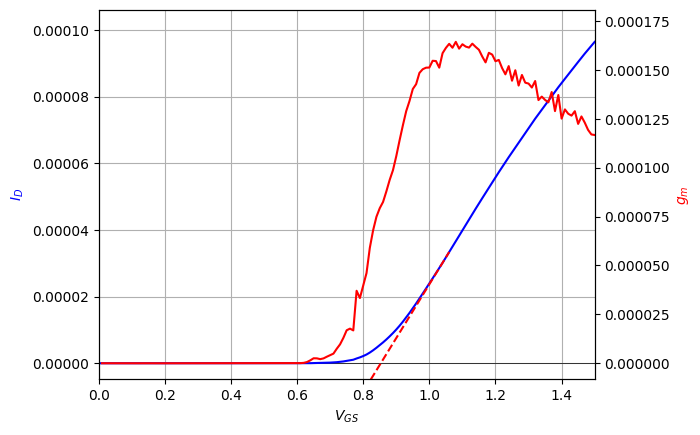

In [6]:
if VGS['enable']:
    print("Connecting")
    HP.SingleSave(plotp, timeout)
    VTO=PlotVgs(plotp)
    print(VTO)

In [20]:
if VGS['enable']:
    HP.SetVgs(0.3*VTO, 0.8*VTO, '5m', VGS['VD'], '1m')
    HP.term='SubVt'
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

NameError: name 'VTO' is not defined

In [ ]:
if VGS['enable']:
    HP.SingleSave(plotp, timeout*60)
    PlotSubVt(plotp)

In [ ]:
if VGS_sat['enable']:
    HP.SetVGS(VGS_sat)
    HP.term='IdxVgs sat'

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

In [ ]:
if VGS_sat['enable']:
    HP.SingleSave(plotp, timeout*60)
    PlotVgs(plotp)

In [ ]:
if VDS['enable']:
    HP.SetVDS(VDS)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

In [ ]:
if VDS['enable']:
    HP.SingleSave(plotp, timeout*60*7)
    Plot(plotp, 'VD', 'ID')

In [ ]:
if Ex_Ib['enable']:
    HP.SetEXIB(Ex_Ib)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

In [ ]:
if Ex_Ib['enable']:    
    HP.SingleSave(plotp, timeout*60*7)
    Plot(plotp, 'VS', 'ID')

In [ ]:
if VP['enable']:
    VP['Ib']=Ex_Ib(plotp)
    HP.SetVP(VP)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

In [ ]:
if VP['enable']:    
    HP.SingleSave(plotp, timeout*60)
    Plot(plotp, 'VG', 'VS')